In [1]:
import pandas as pd

# Analisis básico

En esta notebook se hace un análisis muy básico de la data

No tiene que hacer nada más que entenderla

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,750.00,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,100.00,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,50000.00,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,300.00,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,800.00,6.096910
...,...,...,...,...,...
5818,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,2.57,8.590067
5819,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,2.39,8.621602
5820,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,0.41,9.387216
5821,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,0.63,9.200659


In [4]:
df['molecule_chembl_id'].unique().shape

(5823,)

In [5]:
# Rango dinámico del standar value
df['standard_value'].max(), df['standard_value'].min()

(5888436553555884.0, 5e-06)

# Histograma de longitudes de los smiles

In [6]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))

<AxesSubplot:>

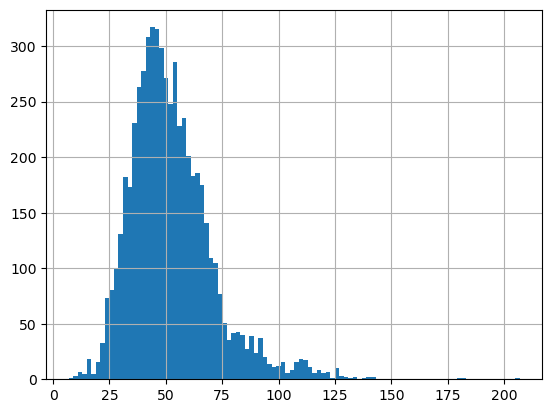

In [7]:
df['canonical_len'].hist(bins=100)

In [8]:
# Max y min 
max_sequence_len = df['canonical_len'].max()
max_sequence_len, df['canonical_len'].min()

(207, 7)

In [9]:
max_len_idx = df['canonical_len'].argmax()
min_len_idx = df['canonical_len'].argmin()

In [10]:
# Ejemplo de molécula más larga
df.iloc[max_len_idx].canonical_smiles

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

In [11]:
# Ejemplo de molécula más corta
df.iloc[min_len_idx].canonical_smiles

'NC(=O)O'

# Histograma de caracteres

In [12]:
from collections import Counter

In [13]:
text = ''
for cs in df['canonical_smiles']:
    text = text + cs

In [14]:
vocab_hist = dict(Counter(text))

In [15]:
vocab_hist

{'C': 63674,
 'O': 14319,
 'c': 74949,
 '1': 17100,
 'n': 4758,
 '(': 24069,
 '-': 2168,
 '2': 13728,
 '3': 8471,
 ')': 24069,
 '=': 8879,
 'o': 797,
 'N': 10620,
 'l': 1615,
 'S': 659,
 'F': 1233,
 '[': 6076,
 '@': 4548,
 'H': 2520,
 ']': 6076,
 '/': 1851,
 '\\': 385,
 '+': 1309,
 '.': 1364,
 'B': 717,
 'r': 693,
 '4': 3534,
 '#': 367,
 'I': 119,
 's': 270,
 '5': 1012,
 '6': 238,
 'P': 34,
 'a': 1,
 '7': 18,
 '8': 6,
 'e': 35,
 'i': 2}

In [16]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 02/02/2023 15:14:52
